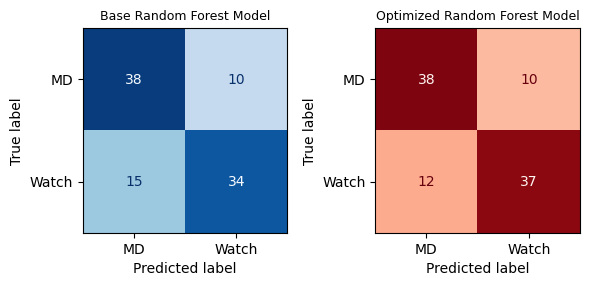

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import joblib
import sys

# Read in dataframe
df = pd.read_csv("central_ok_mds_env_FINAL.csv")

# Unit test to determine if csv read in correctly and no values are missing
if df.isnull().sum().all() == 0:
    pass
else:
    sys.exit('❌ Error. One or more values are missing. Please check csv file to remove any dates with incomplete environmental values.')
    
# Split data
train_data, val_test_data = train_test_split(df, test_size = 0.3, random_state = 988)
val_data, test_data = train_test_split(val_test_data, test_size = 0.6667, random_state = 988)

# Set feature list
feature_list = ['month', 'time', 'pwat', 'mslp', 'cape', 'cin', 't2m', 'rh2m', 'q2m', 'u10', 'v10', 'uv10', 'lcl', 'shr0_6', 'srh0_1', 'srh0_3']

# Read in base Random Forest model
rf_base = joblib.load("random_forest_base.joblib")
rf_base.fit(train_data[feature_list].values, train_data.label.values)

# Test (using validation data) base Random Forest model
predicted_base = rf_base.predict(val_data[feature_list].values)
expected_base = val_data.label.values

# Read in optimized Random Forest model
rf_opt = joblib.load("random_forest_opt.joblib")
rf_opt.fit(train_data[feature_list].values, train_data.label.values)

# Test (using validation data) optimized Random Forest model
predicted_opt = rf_opt.predict(val_data[feature_list].values)
expected_opt = val_data.label.values

# Set baseplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6,4))
ax[0].set_title('Base Random Forest Model', fontsize = 9)
ax[1].set_title('Optimized Random Forest Model', fontsize = 9)

# Plot base confusion matrix
base_matrix = metrics.confusion_matrix(expected_base, predicted_base)
base_matrix_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = base_matrix, display_labels = ['MD', 'Watch']).plot(ax=ax[0], cmap = plt.cm.Blues, 
                                                                                                                         colorbar = False) 
base_matrix_plot.im_.set_clim(vmin = 0, vmax = 40)


# Plot optimized confusion matrix                 
opt_matrix = metrics.confusion_matrix(expected_opt, predicted_opt)
opt_matrix_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = opt_matrix, display_labels = ['MD', 'Watch']).plot(ax = ax[1], cmap = plt.cm.Reds, 
                                                                                                                       colorbar = False)
opt_matrix_plot.im_.set_clim(vmin = 0, vmax = 40)

plt.tight_layout()
plt.savefig('figure_10.jpg')